In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings as wg
wg.filterwarnings('ignore')

In [37]:
df=pd.read_csv('Sample_Superstore.xls - Orders.csv',header=0,index_col=0)

In [38]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,8/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,8/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,12/6/2016,16/6/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [39]:
print(df.shape)

(9994, 20)


In [40]:
# For reading excel files
#pip install xlrd

In [41]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [42]:
furn=df[df["Category"]=="Furniture"]
furn.shape

(2121, 20)

In [43]:
furn.dtypes

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [44]:
furn['Order Date'] = pd.to_datetime(furn['Order Date'])

In [45]:
furn['Order Date'].min(), furn['Order Date'].max(),

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [46]:
furn=furn[["Order Date","Sales"]]
furn.shape

(2121, 2)

In [47]:
furn

,Order Date,Sales
Row ID,,
1,2016-08-11,261.9600
2,2016-08-11,731.9400
4,2015-11-10,957.5775
6,2014-09-06,48.8600
11,2014-09-06,1706.1840
...,...,...
9963,2015-03-19,383.4656
9965,2016-05-12,13.4000
9981,2015-06-09,85.9800


In [48]:
furn=furn.sort_values("Order Date",ascending=True)

In [49]:
furn.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [50]:
furn.head()

,Order Date,Sales
Row ID,,
7949,2014-01-03,362.250
7950,2014-01-03,63.552
8311,2014-01-03,376.509
6548,2014-01-03,634.116
158,2014-01-03,457.568


In [51]:
furn=furn.groupby('Order Date')['Sales'].sum().reset_index()

In [52]:
furn.shape

(889, 2)

In [53]:
furn.head()

,Order Date,Sales
0,2014-01-03,1893.995
1,2014-01-06,2024.060
2,2014-01-08,44.128
3,2014-01-11,100.384
4,2014-01-12,4513.606


In [54]:
furn=furn.set_index('Order Date')
furn.head(10)

,Sales
Order Date,
2014-01-03,1893.995
2014-01-06,2024.060
2014-01-08,44.128
2014-01-11,100.384
2014-01-12,4513.606
2014-01-13,879.939
2014-01-14,61.960
2014-01-16,127.104
2014-01-19,181.470


In [55]:
y=furn['Sales'].resample("M").mean()

In [56]:
print(y.shape)
y

(48,)


Order Date
2014-01-31     864.733571
2014-02-28     248.475714
2014-03-31     800.669889
2014-04-30     525.167692
2014-05-31     390.457467
2014-06-30     611.823918
2014-07-31     601.328500
2014-08-31     729.417324
2014-09-30     844.152147
2014-10-31     818.771824
2014-11-30    1002.974167
2014-12-31    1381.955123
2015-01-31    1463.433262
2015-02-28     894.442556
2015-03-31     758.632233
2015-04-30     674.616300
2015-05-31     696.332806
2015-06-30     462.345456
2015-07-31     733.396412
2015-08-31     906.556600
2015-09-30    1513.551000
2015-10-31     731.694267
2015-11-30     866.242826
2015-12-31     730.189160
2016-01-31     613.566267
2016-02-29     574.572846
2016-03-31     797.139957
2016-04-30     585.658150
2016-05-31    1188.071411
2016-06-30     700.584200
2016-07-31     742.909176
2016-08-31     971.386409
2016-09-30     874.372423
2016-10-31     680.867550
2016-11-30     983.663476
2016-12-31    1275.715521
2017-01-31     925.827053
2017-02-28    1049.935400
2

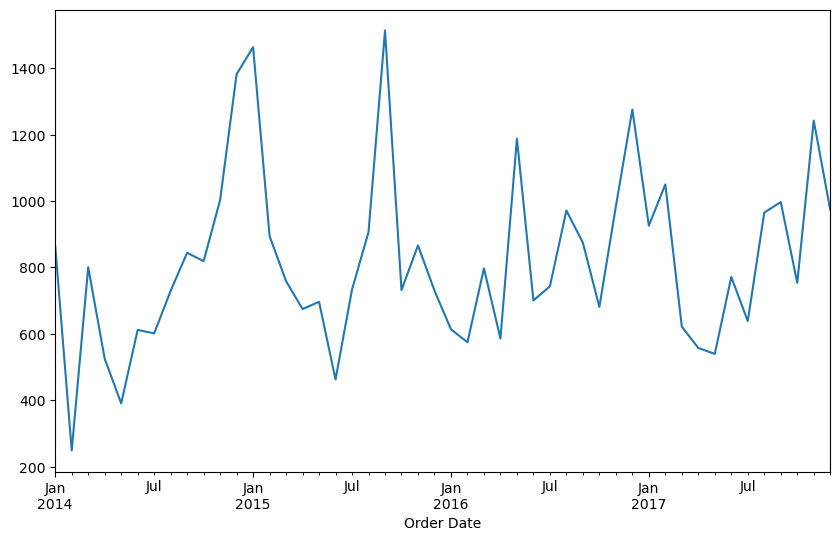

In [57]:
y.plot(figsize=(10,6))
plt.show()

In [58]:
train=y.loc[:'2016-12-31']

In [59]:
print(train.shape)
train

(36,)


Order Date
2014-01-31     864.733571
2014-02-28     248.475714
2014-03-31     800.669889
2014-04-30     525.167692
2014-05-31     390.457467
2014-06-30     611.823918
2014-07-31     601.328500
2014-08-31     729.417324
2014-09-30     844.152147
2014-10-31     818.771824
2014-11-30    1002.974167
2014-12-31    1381.955123
2015-01-31    1463.433262
2015-02-28     894.442556
2015-03-31     758.632233
2015-04-30     674.616300
2015-05-31     696.332806
2015-06-30     462.345456
2015-07-31     733.396412
2015-08-31     906.556600
2015-09-30    1513.551000
2015-10-31     731.694267
2015-11-30     866.242826
2015-12-31     730.189160
2016-01-31     613.566267
2016-02-29     574.572846
2016-03-31     797.139957
2016-04-30     585.658150
2016-05-31    1188.071411
2016-06-30     700.584200
2016-07-31     742.909176
2016-08-31     971.386409
2016-09-30     874.372423
2016-10-31     680.867550
2016-11-30     983.663476
2016-12-31    1275.715521
Freq: M, Name: Sales, dtype: float64

In [60]:
test=y.loc['2017-01-31':]
print(test.shape)
test

(12,)


Order Date
2017-01-31     925.827053
2017-02-28    1049.935400
2017-03-31     621.655512
2017-04-30     557.245886
2017-05-31     539.623495
2017-06-30     771.083705
2017-07-31     638.451841
2017-08-31     965.216000
2017-09-30     996.806227
2017-10-31     753.598800
2017-11-30    1242.404375
2017-12-31     973.765627
Freq: M, Name: Sales, dtype: float64

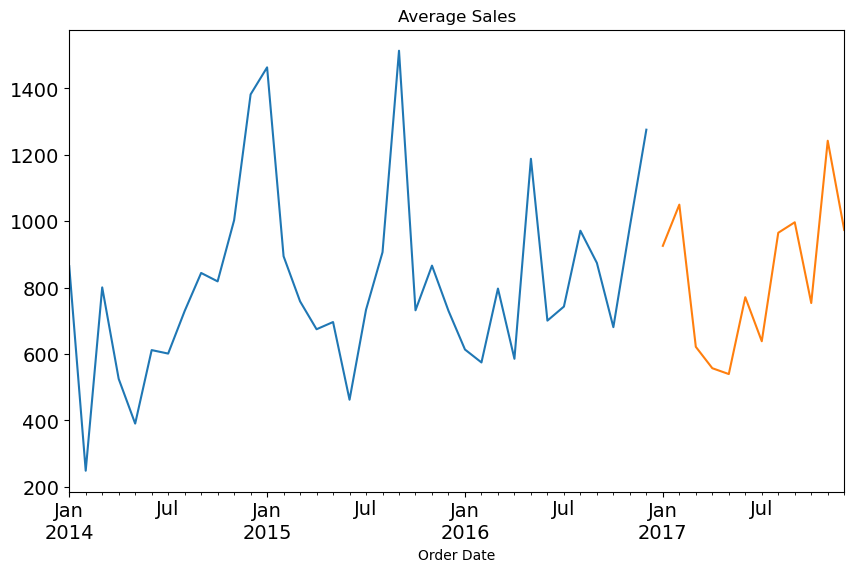

In [61]:
train.plot(figsize=(10,6),title='Average Sales', fontsize=14)
test.plot(figsize=(10,6),title='Average Sales', fontsize=14)
plt.show()

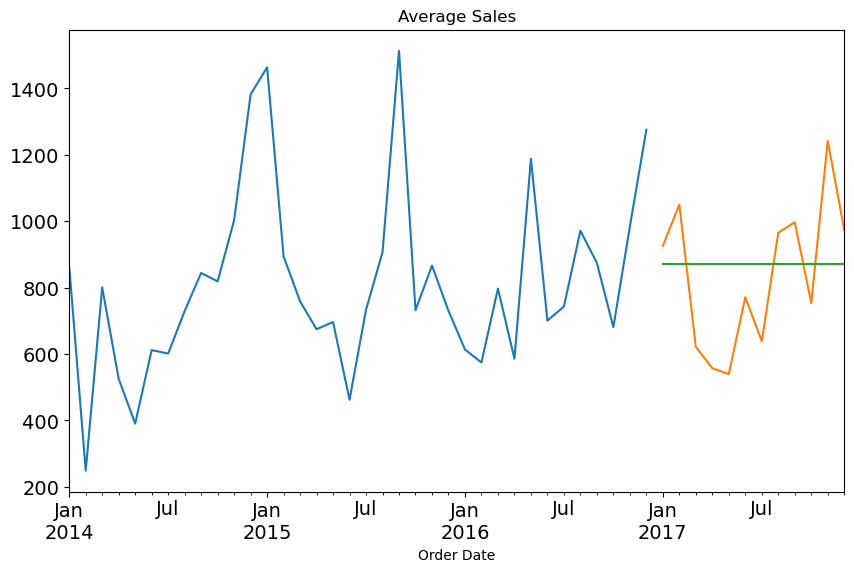

In [62]:
from statsmodels.tsa.api import SimpleExpSmoothing
Exp_Smooth = test.copy()
#smoothing level=alpha
#alpha value should be in the range of 0 to 1.
#values close to 0 indicate that older values are very less imp compared to the recent values
#values close to 1 indicate that older values are equally imp
fit1 = SimpleExpSmoothing(train).fit(smoothing_level=0.1)
Exp_Smooth['SES'] =fit1.forecast(steps=len(test))
train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Exp_Smooth['SES'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [63]:
#RMSE is used to compare different models with same Algo but differrent data/parancter
#choose the model with lowest RMSE value
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test,Exp_Smooth.SES))
print(rmse)

215.51224724163353


# Holt Model

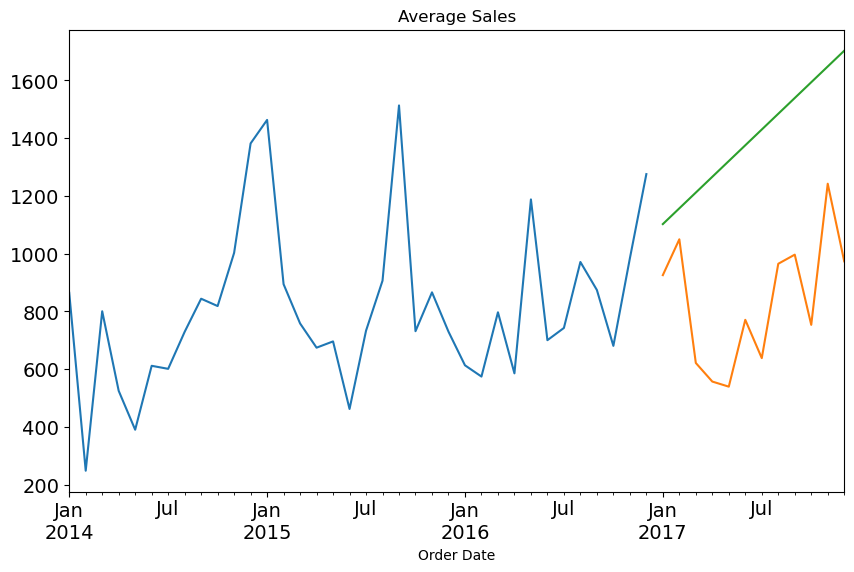

In [64]:
from statsmodels.tsa.api import Holt
Holt_df = test.copy()
#smoothing level-beta
#alpha value should be in the range of 0 to 1.
#values close to 0 indicate that older values are very less imp compared to the recent values
#values close to 1 indicate that older values are equally imp
fit=Holt(train).fit(smoothing_level=0.4,smoothing_slope = 0.25)
Holt_df['Holt_linear'] = fit.forecast(steps=len(test))
train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_df['Holt_linear'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [65]:
rmse = sqrt(mean_squared_error(test,Holt_df['Holt_linear']))
print(rmse)

609.8856043732935


# Holt Winter Model

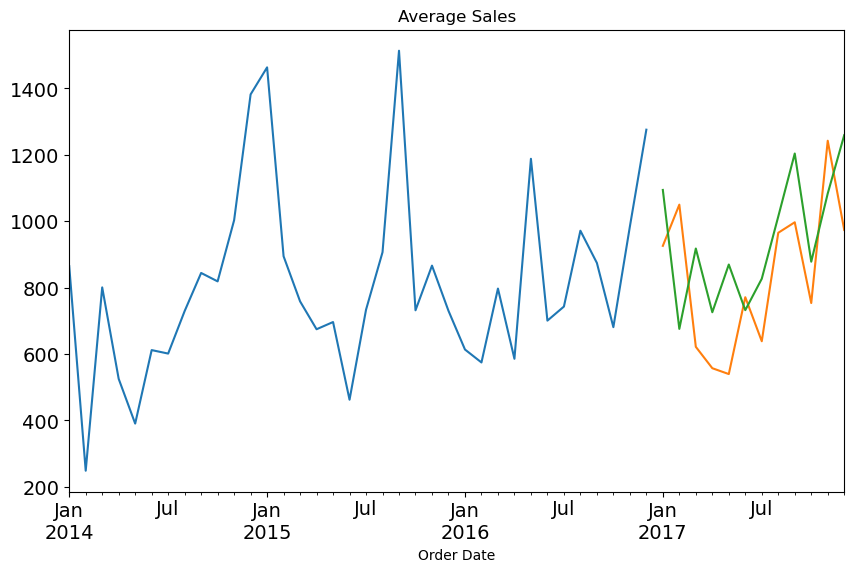

In [66]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()
# smoothing level=gana
# alpha value should be in the range of 0 to 1.
# values close to 0 indicate that older values are very less 1-p cospared to the recet walts
# values close to 1 indicate that older values are cqually imp
fit1= ExponentialSmoothing(train , seasonal_periods=12,trend='add',seasonal='add').fit()
Holt_Winter_df['Holt_Winter'] = fit1.forecast(steps=len(test))
                                              
train.plot(figsize=(10,6), title='Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title="Average Sales", fontsize=14)
plt.show()

In [67]:
rmse = sqrt(mean_squared_error(test,Holt_Winter_df['Holt_Winter']))
print(rmse)

223.19480242151903


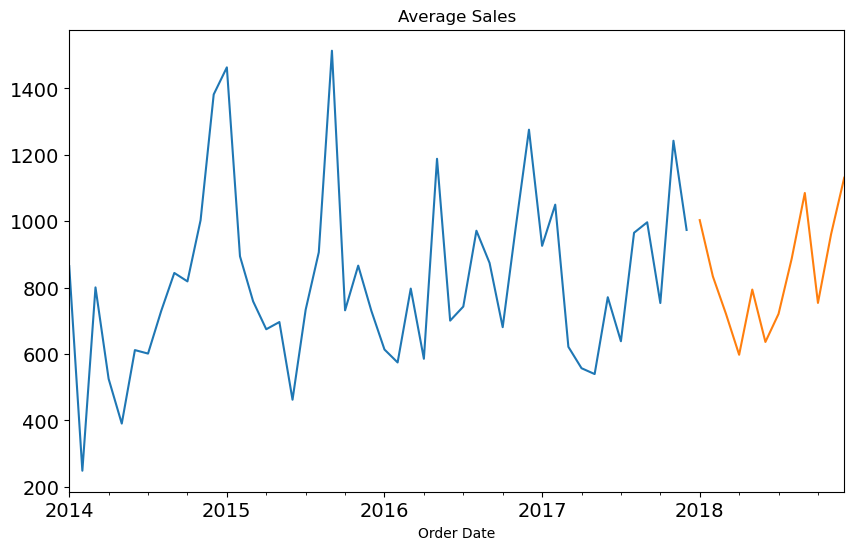

In [68]:
from statsmodels.tsa.api import ExponentialSmoothing
#seasonalperiods=gamma
fit1=ExponentialSmoothing(y , seasonal_periods=12,
trend='add',
seasonal='add').fit()

#Y_predictions = fit1.predict(start=pd.to_datetime("2017-01-31"))
Y_predictions = fit1.forecast(steps=12)
y.plot(figsize=(10,6), title='Average Sales', fontsize=14)
Y_predictions.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [69]:
Y_predictions.to_excel("TimeSeriesOutput.xls",index=True)

NameError: name 'travel_data' is not defined

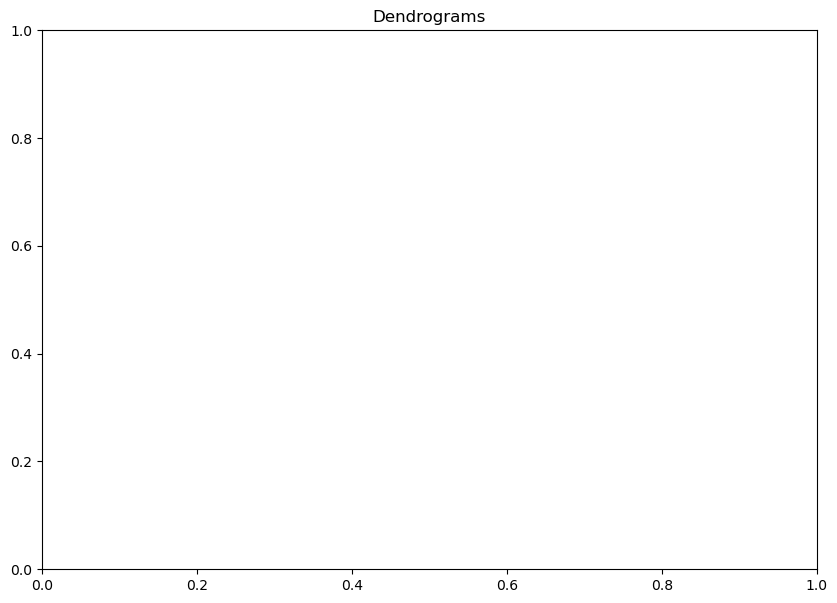

In [70]:
import scipy.cluster.hierarchy as shc 
plt.figure(figsize=(10,7)) 
plt.title("Dendrograms") 
dend = shc.dendrogram(shc.linkage(travel_data,method="ward"))